21.03.19 ML_DL 머신러닝 입문

# Linear regression

## 기존의 프로그램 방식

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense # 입력값과 출력값

- 섭씨 온도(인풋)을 받아서 화씨온도(target data)로 출력 - 기존방식

In [3]:
def celsius_to_faherenheit(x):
    return x * 1.8 + 32

In [4]:
input_c = int(input('섭씨 온도는 : '))
print('화씨 온도는 :', celsius_to_faherenheit(input_c))

섭씨 온도는 : 30
화씨 온도는 : 86.0


## 머신러닝 프로그램 방식
- 1. 데이터 셋 확보 및 전처리
- 2. 데이터 전처리 : 훈련 데이터 셋, 검증 데이터 셋, 시험 데이터 셋...
- 3. 모델 구성
- 4. 모델 학습과정
- 5. 모델 학습 시키기
- 6. 모델 평가(시험 데이터 셋으로)
- 7. 모델 사용(입력값을 주어서 예측값을 받기)

In [5]:
# 1,2번 데이터
data_C = np.array(range(100))
data_C # 입력값

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [6]:
data_F = celsius_to_faherenheit(data_C)
data_F # target 값

array([ 32. ,  33.8,  35.6,  37.4,  39.2,  41. ,  42.8,  44.6,  46.4,
        48.2,  50. ,  51.8,  53.6,  55.4,  57.2,  59. ,  60.8,  62.6,
        64.4,  66.2,  68. ,  69.8,  71.6,  73.4,  75.2,  77. ,  78.8,
        80.6,  82.4,  84.2,  86. ,  87.8,  89.6,  91.4,  93.2,  95. ,
        96.8,  98.6, 100.4, 102.2, 104. , 105.8, 107.6, 109.4, 111.2,
       113. , 114.8, 116.6, 118.4, 120.2, 122. , 123.8, 125.6, 127.4,
       129.2, 131. , 132.8, 134.6, 136.4, 138.2, 140. , 141.8, 143.6,
       145.4, 147.2, 149. , 150.8, 152.6, 154.4, 156.2, 158. , 159.8,
       161.6, 163.4, 165.2, 167. , 168.8, 170.6, 172.4, 174.2, 176. ,
       177.8, 179.6, 181.4, 183.2, 185. , 186.8, 188.6, 190.4, 192.2,
       194. , 195.8, 197.6, 199.4, 201.2, 203. , 204.8, 206.6, 208.4,
       210.2])

In [7]:
# 3. 모델 구성
model = Sequential()
model.add(Dense(1, input_dim=1)) # input_dim=1:독립변수 1개, target데이터:1

# 4. 모델 학습과정 설정
model.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# 학습전 예측
print(model.predict([0]))

[[0.]]


In [9]:
model.save('model/before_learning.h5')

In [10]:
# 2. 컴퓨터에게 학습시키기 위해 normalize함(전체의 편차 줄이기. 이상적인 편차 0~1)
scaled_data_C = data_C/100.0
scaled_data_F = data_F/100.0
print(scaled_data_C, end="\n\n")
print(scaled_data_F)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]

[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.724 1.742 1.76

In [11]:
# 4. 모델 학습시키기
hist = model.fit(scaled_data_C, scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 1.1826 - mae: 1.0096
Epoch 2/1000
4/4 - 0s - loss: 1.1584 - mae: 0.9984
Epoch 3/1000
4/4 - 0s - loss: 1.1409 - mae: 0.9903
Epoch 4/1000
4/4 - 0s - loss: 1.1254 - mae: 0.9830
Epoch 5/1000
4/4 - 0s - loss: 1.1114 - mae: 0.9764
Epoch 6/1000
4/4 - 0s - loss: 1.0975 - mae: 0.9698
Epoch 7/1000
4/4 - 0s - loss: 1.0849 - mae: 0.9637
Epoch 8/1000
4/4 - 0s - loss: 1.0731 - mae: 0.9581
Epoch 9/1000
4/4 - 0s - loss: 1.0613 - mae: 0.9524
Epoch 10/1000
4/4 - 0s - loss: 1.0492 - mae: 0.9464
Epoch 11/1000
4/4 - 0s - loss: 1.0379 - mae: 0.9409
Epoch 12/1000
4/4 - 0s - loss: 1.0251 - mae: 0.9346
Epoch 13/1000
4/4 - 0s - loss: 1.0130 - mae: 0.9285
Epoch 14/1000
4/4 - 0s - loss: 1.0009 - mae: 0.9225
Epoch 15/1000
4/4 - 0s - loss: 0.9887 - mae: 0.9164
Epoch 16/1000
4/4 - 0s - loss: 0.9769 - mae: 0.9103
Epoch 17/1000
4/4 - 0s - loss: 0.9666 - mae: 0.9050
Epoch 18/1000
4/4 - 0s - loss: 0.9559 - mae: 0.8995
Epoch 19/1000
4/4 - 0s - loss: 0.9453 - mae: 0.8942
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 0.0654 - mae: 0.2150
Epoch 159/1000
4/4 - 0s - loss: 0.0638 - mae: 0.2129
Epoch 160/1000
4/4 - 0s - loss: 0.0629 - mae: 0.2115
Epoch 161/1000
4/4 - 0s - loss: 0.0615 - mae: 0.2095
Epoch 162/1000
4/4 - 0s - loss: 0.0600 - mae: 0.2073
Epoch 163/1000
4/4 - 0s - loss: 0.0585 - mae: 0.2050
Epoch 164/1000
4/4 - 0s - loss: 0.0570 - mae: 0.2029
Epoch 165/1000
4/4 - 0s - loss: 0.0558 - mae: 0.2010
Epoch 166/1000
4/4 - 0s - loss: 0.0546 - mae: 0.1992
Epoch 167/1000
4/4 - 0s - loss: 0.0535 - mae: 0.1976
Epoch 168/1000
4/4 - 0s - loss: 0.0528 - mae: 0.1964
Epoch 169/1000
4/4 - 0s - loss: 0.0519 - mae: 0.1950
Epoch 170/1000
4/4 - 0s - loss: 0.0507 - mae: 0.1931
Epoch 171/1000
4/4 - 0s - loss: 0.0498 - mae: 0.1917
Epoch 172/1000
4/4 - 0s - loss: 0.0490 - mae: 0.1903
Epoch 173/1000
4/4 - 0s - loss: 0.0482 - mae: 0.1890
Epoch 174/1000
4/4 - 0s - loss: 0.0477 - mae: 0.1881
Epoch 175/1000
4/4 - 0s - loss: 0.0467 - mae: 0.1864
Epoch 176/1000
4/4 - 0s - loss: 0.0462 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.0070 - mae: 0.0724
Epoch 314/1000
4/4 - 0s - loss: 0.0068 - mae: 0.0714
Epoch 315/1000
4/4 - 0s - loss: 0.0067 - mae: 0.0706
Epoch 316/1000
4/4 - 0s - loss: 0.0065 - mae: 0.0697
Epoch 317/1000
4/4 - 0s - loss: 0.0064 - mae: 0.0691
Epoch 318/1000
4/4 - 0s - loss: 0.0062 - mae: 0.0683
Epoch 319/1000
4/4 - 0s - loss: 0.0061 - mae: 0.0673
Epoch 320/1000
4/4 - 0s - loss: 0.0059 - mae: 0.0665
Epoch 321/1000
4/4 - 0s - loss: 0.0057 - mae: 0.0655
Epoch 322/1000
4/4 - 0s - loss: 0.0056 - mae: 0.0646
Epoch 323/1000
4/4 - 0s - loss: 0.0054 - mae: 0.0637
Epoch 324/1000
4/4 - 0s - loss: 0.0053 - mae: 0.0628
Epoch 325/1000
4/4 - 0s - loss: 0.0052 - mae: 0.0619
Epoch 326/1000
4/4 - 0s - loss: 0.0050 - mae: 0.0611
Epoch 327/1000
4/4 - 0s - loss: 0.0049 - mae: 0.0603
Epoch 328/1000
4/4 - 0s - loss: 0.0047 - mae: 0.0594
Epoch 329/1000
4/4 - 0s - loss: 0.0046 - mae: 0.0586
Epoch 330/1000
4/4 - 0s - loss: 0.0044 - mae: 0.0577
Epoch 331/1000
4/4 - 0s - loss: 0.0043 - mae: 

Epoch 458/1000
4/4 - 0s - loss: 1.0286e-06 - mae: 9.5255e-04
Epoch 459/1000
4/4 - 0s - loss: 1.8402e-07 - mae: 4.0880e-04
Epoch 460/1000
4/4 - 0s - loss: 4.2027e-07 - mae: 6.2278e-04
Epoch 461/1000
4/4 - 0s - loss: 6.3817e-07 - mae: 7.7540e-04
Epoch 462/1000
4/4 - 0s - loss: 1.3275e-06 - mae: 0.0011
Epoch 463/1000
4/4 - 0s - loss: 7.2998e-08 - mae: 2.5617e-04
Epoch 464/1000
4/4 - 0s - loss: 1.6691e-07 - mae: 3.9121e-04
Epoch 465/1000
4/4 - 0s - loss: 4.1867e-07 - mae: 6.0040e-04
Epoch 466/1000
4/4 - 0s - loss: 1.4759e-06 - mae: 0.0012
Epoch 467/1000
4/4 - 0s - loss: 2.7577e-07 - mae: 5.0611e-04
Epoch 468/1000
4/4 - 0s - loss: 4.1135e-07 - mae: 6.2560e-04
Epoch 469/1000
4/4 - 0s - loss: 3.6172e-07 - mae: 5.8136e-04
Epoch 470/1000
4/4 - 0s - loss: 1.2105e-06 - mae: 0.0011
Epoch 471/1000
4/4 - 0s - loss: 5.6192e-07 - mae: 7.1973e-04
Epoch 472/1000
4/4 - 0s - loss: 3.2311e-08 - mae: 1.7336e-04
Epoch 473/1000
4/4 - 0s - loss: 6.7449e-07 - mae: 7.7884e-04
Epoch 474/1000
4/4 - 0s - loss: 9.98

Epoch 594/1000
4/4 - 0s - loss: 3.5647e-07 - mae: 5.8176e-04
Epoch 595/1000
4/4 - 0s - loss: 2.9107e-07 - mae: 5.1914e-04
Epoch 596/1000
4/4 - 0s - loss: 1.0884e-06 - mae: 0.0010
Epoch 597/1000
4/4 - 0s - loss: 5.4965e-07 - mae: 6.7011e-04
Epoch 598/1000
4/4 - 0s - loss: 3.1681e-07 - mae: 5.3708e-04
Epoch 599/1000
4/4 - 0s - loss: 5.7650e-07 - mae: 7.4244e-04
Epoch 600/1000
4/4 - 0s - loss: 9.3836e-07 - mae: 9.3069e-04
Epoch 601/1000
4/4 - 0s - loss: 3.6394e-07 - mae: 5.9078e-04
Epoch 602/1000
4/4 - 0s - loss: 1.0571e-07 - mae: 3.1298e-04
Epoch 603/1000
4/4 - 0s - loss: 1.0884e-06 - mae: 0.0010
Epoch 604/1000
4/4 - 0s - loss: 3.9564e-07 - mae: 6.1480e-04
Epoch 605/1000
4/4 - 0s - loss: 2.0579e-08 - mae: 1.2330e-04
Epoch 606/1000
4/4 - 0s - loss: 2.8793e-07 - mae: 4.7699e-04
Epoch 607/1000
4/4 - 0s - loss: 1.5421e-06 - mae: 0.0012
Epoch 608/1000
4/4 - 0s - loss: 5.6107e-07 - mae: 7.1146e-04
Epoch 609/1000
4/4 - 0s - loss: 5.4357e-08 - mae: 2.2863e-04
Epoch 610/1000
4/4 - 0s - loss: 5.64

Epoch 730/1000
4/4 - 0s - loss: 1.4214e-06 - mae: 0.0012
Epoch 731/1000
4/4 - 0s - loss: 1.4223e-07 - mae: 3.6954e-04
Epoch 732/1000
4/4 - 0s - loss: 6.9228e-08 - mae: 2.4639e-04
Epoch 733/1000
4/4 - 0s - loss: 8.5982e-07 - mae: 8.6697e-04
Epoch 734/1000
4/4 - 0s - loss: 6.9236e-07 - mae: 8.1691e-04
Epoch 735/1000
4/4 - 0s - loss: 4.9403e-08 - mae: 2.0586e-04
Epoch 736/1000
4/4 - 0s - loss: 1.2410e-08 - mae: 9.0426e-05
Epoch 737/1000
4/4 - 0s - loss: 9.8716e-07 - mae: 8.6347e-04
Epoch 738/1000
4/4 - 0s - loss: 6.3197e-07 - mae: 7.7618e-04
Epoch 739/1000
4/4 - 0s - loss: 7.1411e-07 - mae: 8.2624e-04
Epoch 740/1000
4/4 - 0s - loss: 6.4961e-07 - mae: 7.8420e-04
Epoch 741/1000
4/4 - 0s - loss: 4.4543e-08 - mae: 1.9923e-04
Epoch 742/1000
4/4 - 0s - loss: 5.0943e-07 - mae: 6.7034e-04
Epoch 743/1000
4/4 - 0s - loss: 1.5917e-06 - mae: 0.0011
Epoch 744/1000
4/4 - 0s - loss: 7.4082e-08 - mae: 2.6588e-04
Epoch 745/1000
4/4 - 0s - loss: 7.1575e-08 - mae: 2.5862e-04
Epoch 746/1000
4/4 - 0s - loss: 

Epoch 866/1000
4/4 - 0s - loss: 4.2820e-07 - mae: 6.4243e-04
Epoch 867/1000
4/4 - 0s - loss: 7.6966e-07 - mae: 8.5198e-04
Epoch 868/1000
4/4 - 0s - loss: 6.3453e-08 - mae: 2.1561e-04
Epoch 869/1000
4/4 - 0s - loss: 3.5261e-08 - mae: 1.6016e-04
Epoch 870/1000
4/4 - 0s - loss: 1.7314e-06 - mae: 0.0012
Epoch 871/1000
4/4 - 0s - loss: 6.1731e-07 - mae: 7.2331e-04
Epoch 872/1000
4/4 - 0s - loss: 7.2232e-08 - mae: 2.5914e-04
Epoch 873/1000
4/4 - 0s - loss: 1.6578e-07 - mae: 3.8387e-04
Epoch 874/1000
4/4 - 0s - loss: 1.4438e-06 - mae: 0.0012
Epoch 875/1000
4/4 - 0s - loss: 5.0622e-07 - mae: 6.8531e-04
Epoch 876/1000
4/4 - 0s - loss: 1.3932e-07 - mae: 3.6469e-04
Epoch 877/1000
4/4 - 0s - loss: 5.1375e-07 - mae: 6.8526e-04
Epoch 878/1000
4/4 - 0s - loss: 1.4340e-06 - mae: 0.0011
Epoch 879/1000
4/4 - 0s - loss: 9.3867e-08 - mae: 2.8986e-04
Epoch 880/1000
4/4 - 0s - loss: 1.5680e-07 - mae: 3.7969e-04
Epoch 881/1000
4/4 - 0s - loss: 1.1704e-06 - mae: 0.0011
Epoch 882/1000
4/4 - 0s - loss: 5.0922e-

In [12]:
hist.history.keys()

dict_keys(['loss', 'mae'])

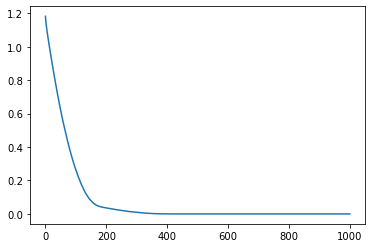

In [13]:
plt.plot(hist.history['loss'])
plt.show()

In [14]:
model.predict([0.01])

array([[0.33861023]], dtype=float32)

In [15]:
model.save('model/after_learning.h5')

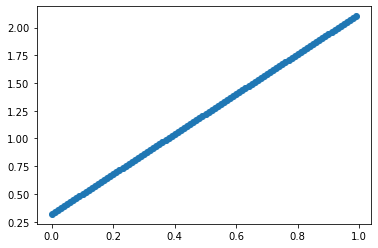

In [16]:
plt.scatter(x=scaled_data_C, y=scaled_data_F)

## 노이즈가 있는 데이터

In [17]:
# 평균이 0이고 표준편차가 0.1인 데이터 100
np.random.seed(703)
noise = np.array(np.random.normal(0, 0.1, 100))
nosied_scaled_data_F = scaled_data_F + noise

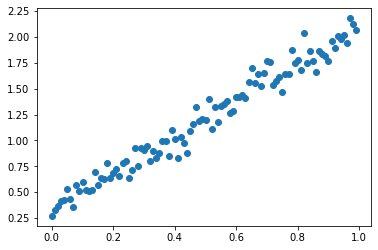

In [18]:
plt.scatter(x=scaled_data_C, y=nosied_scaled_data_F)
plt.show()

In [19]:
# 3. 모델 구성
model2 = Sequential()
model2.add(Dense(1, input_dim=1))
# 4. 학습과정 설정
model2.compile(loss="mse", optimizer="rmsprop", metrics=['mae'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
# 5. 모델 학습시키기
hist2 = model2.fit(scaled_data_C, nosied_scaled_data_F, epochs=1000, verbose=2)

Epoch 1/1000
4/4 - 0s - loss: 4.1513 - mae: 1.8362
Epoch 2/1000
4/4 - 0s - loss: 4.1077 - mae: 1.8254
Epoch 3/1000
4/4 - 0s - loss: 4.0730 - mae: 1.8167
Epoch 4/1000
4/4 - 0s - loss: 4.0461 - mae: 1.8100
Epoch 5/1000
4/4 - 0s - loss: 4.0209 - mae: 1.8035
Epoch 6/1000
4/4 - 0s - loss: 3.9967 - mae: 1.7974
Epoch 7/1000
4/4 - 0s - loss: 3.9729 - mae: 1.7914
Epoch 8/1000
4/4 - 0s - loss: 3.9469 - mae: 1.7848
Epoch 9/1000
4/4 - 0s - loss: 3.9225 - mae: 1.7784
Epoch 10/1000
4/4 - 0s - loss: 3.8997 - mae: 1.7725
Epoch 11/1000
4/4 - 0s - loss: 3.8781 - mae: 1.7671
Epoch 12/1000
4/4 - 0s - loss: 3.8546 - mae: 1.7609
Epoch 13/1000
4/4 - 0s - loss: 3.8336 - mae: 1.7553
Epoch 14/1000
4/4 - 0s - loss: 3.8117 - mae: 1.7497
Epoch 15/1000
4/4 - 0s - loss: 3.7875 - mae: 1.7434
Epoch 16/1000
4/4 - 0s - loss: 3.7657 - mae: 1.7376
Epoch 17/1000
4/4 - 0s - loss: 3.7430 - mae: 1.7317
Epoch 18/1000
4/4 - 0s - loss: 3.7229 - mae: 1.7263
Epoch 19/1000
4/4 - 0s - loss: 3.7016 - mae: 1.7207
Epoch 20/1000
4/4 - 0

Epoch 158/1000
4/4 - 0s - loss: 1.3357 - mae: 0.9494
Epoch 159/1000
4/4 - 0s - loss: 1.3247 - mae: 0.9450
Epoch 160/1000
4/4 - 0s - loss: 1.3130 - mae: 0.9404
Epoch 161/1000
4/4 - 0s - loss: 1.3010 - mae: 0.9357
Epoch 162/1000
4/4 - 0s - loss: 1.2904 - mae: 0.9315
Epoch 163/1000
4/4 - 0s - loss: 1.2781 - mae: 0.9267
Epoch 164/1000
4/4 - 0s - loss: 1.2651 - mae: 0.9215
Epoch 165/1000
4/4 - 0s - loss: 1.2524 - mae: 0.9163
Epoch 166/1000
4/4 - 0s - loss: 1.2415 - mae: 0.9119
Epoch 167/1000
4/4 - 0s - loss: 1.2310 - mae: 0.9076
Epoch 168/1000
4/4 - 0s - loss: 1.2200 - mae: 0.9032
Epoch 169/1000
4/4 - 0s - loss: 1.2077 - mae: 0.8981
Epoch 170/1000
4/4 - 0s - loss: 1.1976 - mae: 0.8940
Epoch 171/1000
4/4 - 0s - loss: 1.1875 - mae: 0.8899
Epoch 172/1000
4/4 - 0s - loss: 1.1752 - mae: 0.8850
Epoch 173/1000
4/4 - 0s - loss: 1.1632 - mae: 0.8801
Epoch 174/1000
4/4 - 0s - loss: 1.1526 - mae: 0.8757
Epoch 175/1000
4/4 - 0s - loss: 1.1409 - mae: 0.8709
Epoch 176/1000
4/4 - 0s - loss: 1.1309 - mae: 

Epoch 313/1000
4/4 - 0s - loss: 0.3020 - mae: 0.4795
Epoch 314/1000
4/4 - 0s - loss: 0.3011 - mae: 0.4788
Epoch 315/1000
4/4 - 0s - loss: 0.2996 - mae: 0.4779
Epoch 316/1000
4/4 - 0s - loss: 0.2978 - mae: 0.4767
Epoch 317/1000
4/4 - 0s - loss: 0.2964 - mae: 0.4758
Epoch 318/1000
4/4 - 0s - loss: 0.2943 - mae: 0.4744
Epoch 319/1000
4/4 - 0s - loss: 0.2930 - mae: 0.4736
Epoch 320/1000
4/4 - 0s - loss: 0.2915 - mae: 0.4725
Epoch 321/1000
4/4 - 0s - loss: 0.2900 - mae: 0.4714
Epoch 322/1000
4/4 - 0s - loss: 0.2885 - mae: 0.4704
Epoch 323/1000
4/4 - 0s - loss: 0.2869 - mae: 0.4692
Epoch 324/1000
4/4 - 0s - loss: 0.2853 - mae: 0.4680
Epoch 325/1000
4/4 - 0s - loss: 0.2835 - mae: 0.4666
Epoch 326/1000
4/4 - 0s - loss: 0.2819 - mae: 0.4655
Epoch 327/1000
4/4 - 0s - loss: 0.2811 - mae: 0.4648
Epoch 328/1000
4/4 - 0s - loss: 0.2797 - mae: 0.4637
Epoch 329/1000
4/4 - 0s - loss: 0.2790 - mae: 0.4632
Epoch 330/1000
4/4 - 0s - loss: 0.2774 - mae: 0.4619
Epoch 331/1000
4/4 - 0s - loss: 0.2763 - mae: 

Epoch 468/1000
4/4 - 0s - loss: 0.1581 - mae: 0.3492
Epoch 469/1000
4/4 - 0s - loss: 0.1573 - mae: 0.3483
Epoch 470/1000
4/4 - 0s - loss: 0.1565 - mae: 0.3474
Epoch 471/1000
4/4 - 0s - loss: 0.1558 - mae: 0.3466
Epoch 472/1000
4/4 - 0s - loss: 0.1552 - mae: 0.3459
Epoch 473/1000
4/4 - 0s - loss: 0.1543 - mae: 0.3449
Epoch 474/1000
4/4 - 0s - loss: 0.1537 - mae: 0.3443
Epoch 475/1000
4/4 - 0s - loss: 0.1529 - mae: 0.3434
Epoch 476/1000
4/4 - 0s - loss: 0.1520 - mae: 0.3424
Epoch 477/1000
4/4 - 0s - loss: 0.1512 - mae: 0.3415
Epoch 478/1000
4/4 - 0s - loss: 0.1505 - mae: 0.3406
Epoch 479/1000
4/4 - 0s - loss: 0.1499 - mae: 0.3399
Epoch 480/1000
4/4 - 0s - loss: 0.1493 - mae: 0.3391
Epoch 481/1000
4/4 - 0s - loss: 0.1487 - mae: 0.3383
Epoch 482/1000
4/4 - 0s - loss: 0.1482 - mae: 0.3378
Epoch 483/1000
4/4 - 0s - loss: 0.1477 - mae: 0.3371
Epoch 484/1000
4/4 - 0s - loss: 0.1471 - mae: 0.3364
Epoch 485/1000
4/4 - 0s - loss: 0.1465 - mae: 0.3359
Epoch 486/1000
4/4 - 0s - loss: 0.1459 - mae: 

Epoch 623/1000
4/4 - 0s - loss: 0.0670 - mae: 0.2260
Epoch 624/1000
4/4 - 0s - loss: 0.0665 - mae: 0.2252
Epoch 625/1000
4/4 - 0s - loss: 0.0661 - mae: 0.2245
Epoch 626/1000
4/4 - 0s - loss: 0.0657 - mae: 0.2238
Epoch 627/1000
4/4 - 0s - loss: 0.0653 - mae: 0.2231
Epoch 628/1000
4/4 - 0s - loss: 0.0648 - mae: 0.2222
Epoch 629/1000
4/4 - 0s - loss: 0.0644 - mae: 0.2215
Epoch 630/1000
4/4 - 0s - loss: 0.0640 - mae: 0.2208
Epoch 631/1000
4/4 - 0s - loss: 0.0635 - mae: 0.2199
Epoch 632/1000
4/4 - 0s - loss: 0.0631 - mae: 0.2190
Epoch 633/1000
4/4 - 0s - loss: 0.0627 - mae: 0.2183
Epoch 634/1000
4/4 - 0s - loss: 0.0624 - mae: 0.2178
Epoch 635/1000
4/4 - 0s - loss: 0.0621 - mae: 0.2171
Epoch 636/1000
4/4 - 0s - loss: 0.0617 - mae: 0.2164
Epoch 637/1000
4/4 - 0s - loss: 0.0612 - mae: 0.2157
Epoch 638/1000
4/4 - 0s - loss: 0.0608 - mae: 0.2148
Epoch 639/1000
4/4 - 0s - loss: 0.0604 - mae: 0.2143
Epoch 640/1000
4/4 - 0s - loss: 0.0599 - mae: 0.2133
Epoch 641/1000
4/4 - 0s - loss: 0.0595 - mae: 

Epoch 778/1000
4/4 - 0s - loss: 0.0193 - mae: 0.1139
Epoch 779/1000
4/4 - 0s - loss: 0.0192 - mae: 0.1133
Epoch 780/1000
4/4 - 0s - loss: 0.0190 - mae: 0.1127
Epoch 781/1000
4/4 - 0s - loss: 0.0188 - mae: 0.1121
Epoch 782/1000
4/4 - 0s - loss: 0.0187 - mae: 0.1115
Epoch 783/1000
4/4 - 0s - loss: 0.0185 - mae: 0.1109
Epoch 784/1000
4/4 - 0s - loss: 0.0184 - mae: 0.1105
Epoch 785/1000
4/4 - 0s - loss: 0.0182 - mae: 0.1099
Epoch 786/1000
4/4 - 0s - loss: 0.0180 - mae: 0.1093
Epoch 787/1000
4/4 - 0s - loss: 0.0179 - mae: 0.1087
Epoch 788/1000
4/4 - 0s - loss: 0.0177 - mae: 0.1079
Epoch 789/1000
4/4 - 0s - loss: 0.0175 - mae: 0.1073
Epoch 790/1000
4/4 - 0s - loss: 0.0173 - mae: 0.1066
Epoch 791/1000
4/4 - 0s - loss: 0.0171 - mae: 0.1059
Epoch 792/1000
4/4 - 0s - loss: 0.0170 - mae: 0.1053
Epoch 793/1000
4/4 - 0s - loss: 0.0168 - mae: 0.1047
Epoch 794/1000
4/4 - 0s - loss: 0.0166 - mae: 0.1041
Epoch 795/1000
4/4 - 0s - loss: 0.0165 - mae: 0.1036
Epoch 796/1000
4/4 - 0s - loss: 0.0164 - mae: 

Epoch 933/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0719
Epoch 934/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0719
Epoch 935/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0718
Epoch 936/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0718
Epoch 937/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0718
Epoch 938/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0718
Epoch 939/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0718
Epoch 940/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0717
Epoch 941/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0717
Epoch 942/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0716
Epoch 943/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0717
Epoch 944/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0716
Epoch 945/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0715
Epoch 946/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0714
Epoch 947/1000
4/4 - 0s - loss: 0.0088 - mae: 0.0715
Epoch 948/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0715
Epoch 949/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0714
Epoch 950/1000
4/4 - 0s - loss: 0.0087 - mae: 0.0713
Epoch 951/1000
4/4 - 0s - loss: 0.0087 - mae: 

In [21]:
print(model2.predict(np.array([0.01])))

[[0.3632218]]


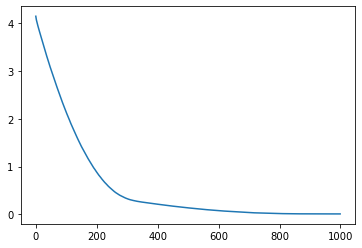

In [22]:
plt.plot(hist2.history['loss'])

In [23]:
model2.save('model/noise_after_learning.h5')